## MODELO DE ÁRVORE DE DECISÃO

## Modelo com 300 linhas

In [42]:
# Importar bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.tree import plot_tree

In [43]:
# Importar dataset

df = pd.read_excel(r"C:\Users\Usuário\Desktop\dataset_deslizamentos.xlsx")
df.head() # mostra as primeiras 5 linhas

,precipitacao,pluviometro,umidade,deslizamento
0,0,0,20,0
1,1,50,36,0
2,0,0,36,0
3,1,15,38,0
4,0,0,38,0


In [44]:
# Verificar o total de linhas e colunas no dataset

df.shape

(300, 4)

In [45]:
# Descrever dados estatísticos do dataset
df.describe()

,precipitacao,pluviometro,umidade,deslizamento
count,300.000000,300.000000,300.000000,300.000000
mean,0.443333,10.053333,44.526667,0.040000
std,0.497609,13.435234,15.490075,0.196287
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,34.000000,0.000000
50%,0.000000,0.000000,44.000000,0.000000
75%,1.000000,19.000000,55.000000,0.000000
max,1.000000,70.000000,83.000000,1.000000


In [46]:
# Verificar o número de ocorrências de deslizamento e não deslizamento (sim e não)

df['deslizamento'].value_counts()

0    288
1     12
Name: deslizamento, dtype: int64

In [47]:
# Separação das variáveis

X = df.drop(columns='deslizamento', axis=1)
Y = df['deslizamento']

In [48]:
# Dividir o dataset na proporção 70/30

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, stratify = Y, random_state=2)

# Imprimir o tamanho do dataset original
print("Dataset original:", X.shape)

# Imprimir o dataset de teste
print("Dataset de teste:", X_test.shape)

# Imprimir o dataset de treinamento
print("Dataset de treinamento (X_train):", X_train.shape)

Dataset original: (300, 3)
Dataset de teste: (90, 3)
Dataset de treinamento (X_train): (210, 3)


In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 🦾 Criação do modelo 

In [67]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)

In [68]:
dt.fit(X_train, Y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(Y_test, dt_predicted)
dt_acc_score = accuracy_score(Y_test, dt_predicted)

In [69]:
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(Y_test,dt_predicted))

confussion matrix
[[286   0]
 [  0  14]]


Accuracy of DecisionTreeClassifier: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00        14

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



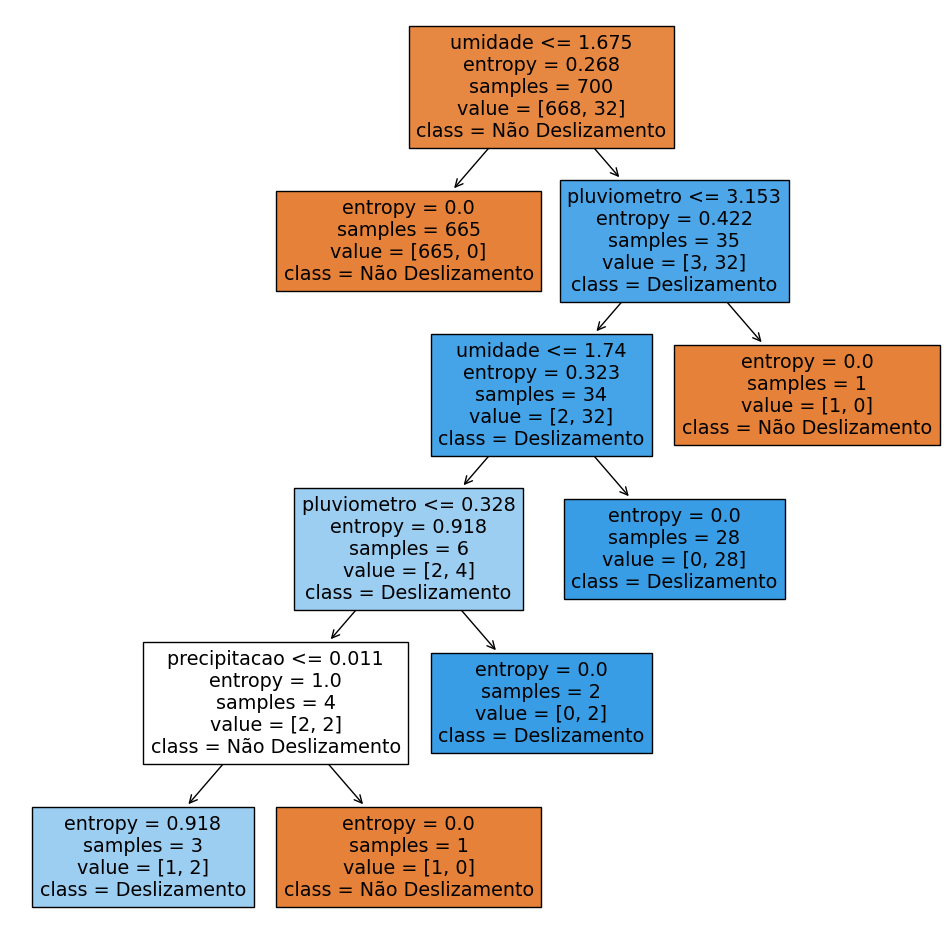

In [70]:
# Plotar árvore de decisão

plt.figure(figsize=(12, 12))
plot_tree(dt, feature_names=X.columns, class_names=['Não Deslizamento', 'Deslizamento'], filled=True)
plt.show()

## 📊 Métricas

In [16]:
import seaborn as sns
from sklearn.metrics import recall_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score

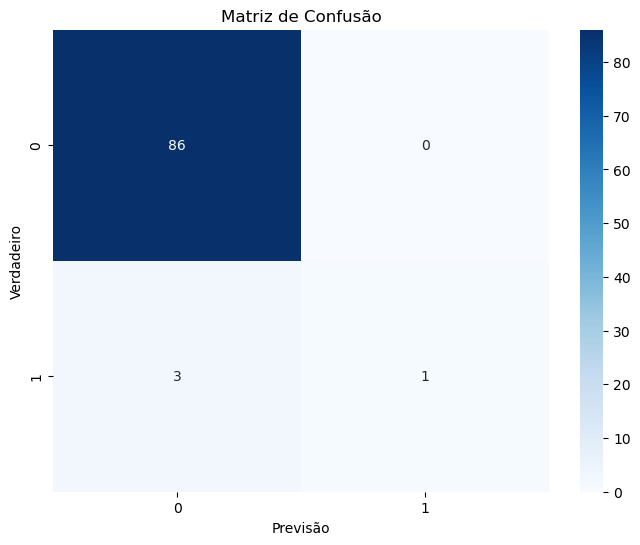

In [19]:
# Calcular a matriz de confusão
cm = confusion_matrix(Y_test, dt.predict(X_test))

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

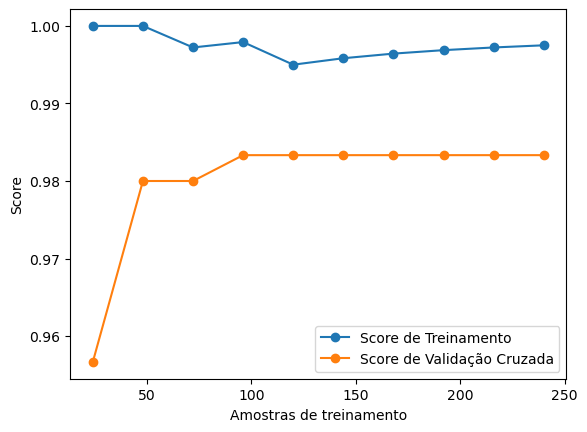

In [21]:
train_sizes, train_scores, test_scores = learning_curve(dt, X, Y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label="Score de Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Score de Validação Cruzada")
plt.legend(loc="best")
plt.xlabel("Amostras de treinamento")
plt.ylabel("Score")
plt.show()

In [23]:
train_pred = dt.predict(X_train)
f1_train = f1_score(Y_train, train_pred)

print("F-score nos dados de treinamento = {}".format(f1_train))

F-score nos dados de treinamento = 0.9333333333333333


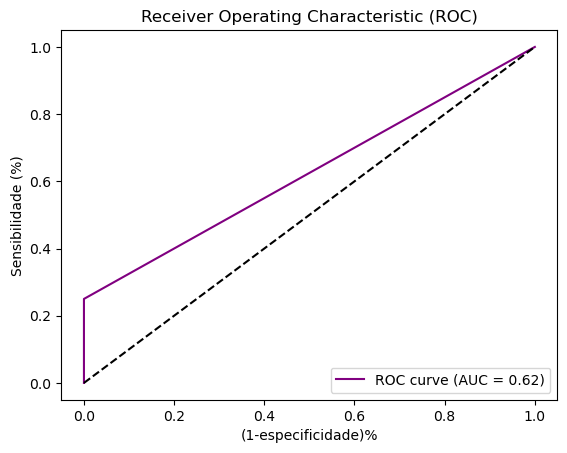

In [26]:
# Calcular as probabilidades das classes positivas
probabilities = dt.predict_proba(X_test)[:, 1]

# Calcular a taxa de falsos positivos e a taxa de verdadeiros positivos
fpr, tpr, thresholds = roc_curve(Y_test, probabilities)

# Calcular a área sob a curva ROC (AUC-ROC)
auc = roc_auc_score(Y_test, probabilities)

# Plotar a curva ROC
plt.plot(fpr, tpr, color='purple', label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência para uma classificação aleatória
plt.xlabel('(1-especificidade)%')
plt.ylabel('Sensibilidade (%)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## Modelo com 1000 linhas

In [53]:
# Importar dataset

df_2 = pd.read_excel(r"C:\Users\Usuário\Desktop\dataset_deslizamentos_1000.xlsx")
df.head() # mostra as primeiras 5 linhas

,precipitacao,pluviometro,umidade,deslizamento
0,0,0,20,0
1,1,50,36,0
2,0,0,36,0
3,1,15,38,0
4,0,0,38,0


In [54]:
# Verificar o total de linhas e colunas no dataset

df_2.shape

(1000, 4)

In [55]:
# Descrever dados estatísticos do dataset
df_2.describe()

,precipitacao,pluviometro,umidade,deslizamento
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,0.495000,11.143000,43.93400,0.04600
std,0.500225,13.401274,15.34011,0.20959
min,0.000000,0.000000,-10.00000,0.00000
25%,0.000000,0.000000,33.00000,0.00000
50%,0.000000,0.000000,44.00000,0.00000
75%,1.000000,20.000000,55.00000,0.00000
max,1.000000,70.000000,85.00000,1.00000


In [56]:
# Verificar o número de ocorrências de deslizamento e não deslizamento (sim e não)

df_2['deslizamento'].value_counts()

0    954
1     46
Name: deslizamento, dtype: int64

In [57]:
# Separação das variáveis

X = df_2.drop(columns='deslizamento', axis=1)
Y = df_2['deslizamento']

In [58]:
# Dividir o dataset na proporção 70/30

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, stratify = Y, random_state=2)

# Imprimir o tamanho do dataset original
print("Dataset original:", X.shape)

# Imprimir o dataset de teste
print("Dataset de teste:", X_test.shape)

# Imprimir o dataset de treinamento
print("Dataset de treinamento (X_train):", X_train.shape)

Dataset original: (1000, 3)
Dataset de teste: (300, 3)
Dataset de treinamento (X_train): (700, 3)


In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 🦾 Criação do modelo 

In [60]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)

In [61]:
dt.fit(X_train, Y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(Y_test, dt_predicted)
dt_acc_score = accuracy_score(Y_test, dt_predicted)

In [62]:
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(Y_test,dt_predicted))

confussion matrix
[[286   0]
 [  0  14]]


Accuracy of DecisionTreeClassifier: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00        14

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



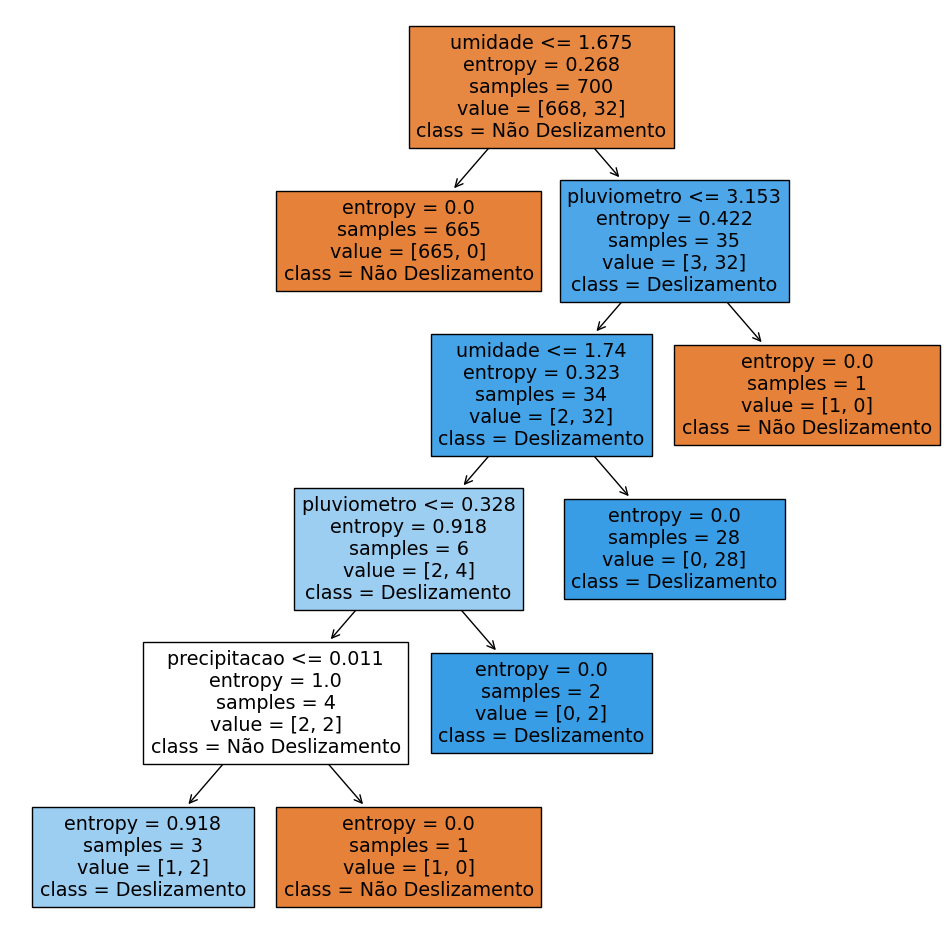

In [65]:
# Plotar árvore de decisão

plt.figure(figsize=(12, 12))
plot_tree(dt, feature_names=X.columns, class_names=['Não Deslizamento', 'Deslizamento'], filled=True)
plt.show()

## 📊 Métricas

In [37]:
import seaborn as sns
from sklearn.metrics import recall_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score

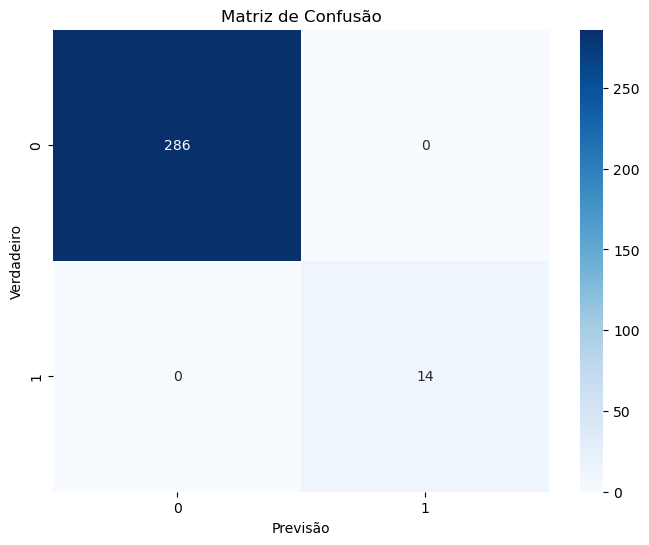

In [38]:
# Calcular a matriz de confusão
cm = confusion_matrix(Y_test, dt.predict(X_test))

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

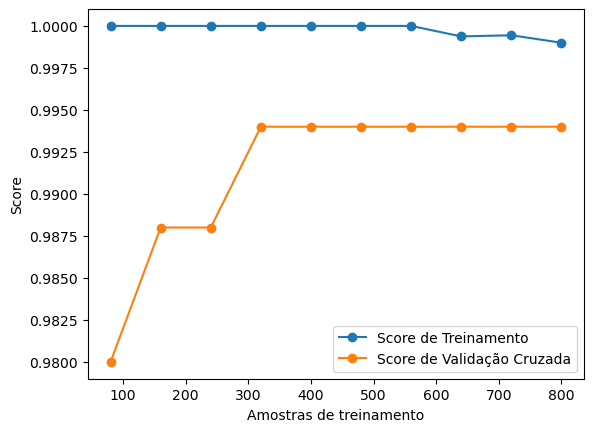

In [39]:
train_sizes, train_scores, test_scores = learning_curve(dt, X, Y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label="Score de Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Score de Validação Cruzada")
plt.legend(loc="best")
plt.xlabel("Amostras de treinamento")
plt.ylabel("Score")
plt.show()

In [40]:
train_pred = dt.predict(X_train)
f1_train = f1_score(Y_train, train_pred)

print("F-score nos dados de treinamento = {}".format(f1_train))

F-score nos dados de treinamento = 0.9846153846153847


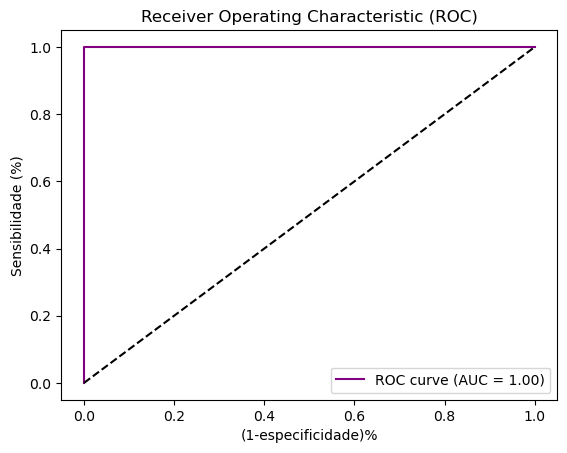

In [41]:
# Calcular as probabilidades das classes positivas
probabilities = dt.predict_proba(X_test)[:, 1]

# Calcular a taxa de falsos positivos e a taxa de verdadeiros positivos
fpr, tpr, thresholds = roc_curve(Y_test, probabilities)

# Calcular a área sob a curva ROC (AUC-ROC)
auc = roc_auc_score(Y_test, probabilities)

# Plotar a curva ROC
plt.plot(fpr, tpr, color='purple', label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência para uma classificação aleatória
plt.xlabel('(1-especificidade)%')
plt.ylabel('Sensibilidade (%)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()